In [1]:
import numpy as np
import scipy
from scipy import special
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
plt.style.use('seaborn-pastel')
import time

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
22

1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
[[  0.           0.           0.         ...   0.           0.
  100.      

<IPython.core.display.Javascript object>


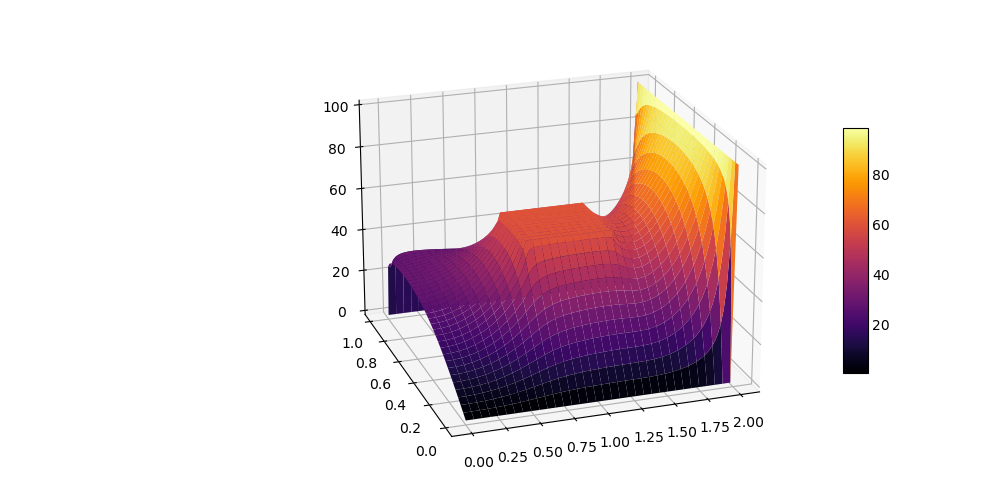

In [12]:
start_time = time.time()
lambd = 1
#f0 = 10
q = 200
L_x = 2
L_y = 1
m = 100
n = 100
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
M = 0
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
Temp = 100
T0 = 60
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i])
beta1 = np.zeros([r_i])
alph2 = np.zeros([r_j])
beta2 = np.zeros([r_j])
#задаем f0
def f0(c, x, y, T = T0):
    return c * T
def f1(c, x, y, T = T0):
    return -c
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd *(1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y))
def lambd_m_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y))
def lambd_n_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y))
def lambd_n_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y, c):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_E(lambd, x, y) - f1(c, x, y) * h_x * h_y
for s in range(2000):
    # продольная прогонка
    for j in range(1,r_j-1):
        #beta_N = lambd * h_x / h_y
        #beta_W = lambd * h_y / h_x
        #beta_S = lambd * h_x / h_y
        #beta_E = lambd * h_y / h_x
        #beta_P = beta_E + beta_N + beta_S + beta_W
        #нет потока
        alph1[0] = 1
        beta1[0] = 0
        for i in range(1,r_i-1):
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph1[i] = -E / (W * alph1[i - 1] - P)
            beta1[i] = (-F - N * g_y_x[j+1][i] - S * g_y_x[j-1][i] - W * beta1[i-1]) / (W * alph1[i - 1] - P)
            #if M != 0: print(alph1[i], beta1[i], F, P, M)
        #g_y_x[j][r_i-1] = (-F - N * g_y_x[j+1][r_i-1] - S * g_y_x[j-1][r_i-2] - W * beta1[r_i-2]) / (-P + W * alph1[r_i-2]) 
        for m in range(r_i - 2, -1, -1):
            g_y_x[j][m] = g_y_x[j][m + 1] * alph1[m] + beta1[m]
    # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = 0
        for j in range(1,r_j-1):
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph2[j] = -N / (S * alph2[j - 1] - P)
            beta2[j] = (-F -E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * beta2[j-1]) / (S * alph2[j - 1] - P)
        #g_y_x[r_j-2][i] =  (-F - E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * q * h_y / lyambd) / (S - P)
        if i == 1: g_y_x[r_j-2][0] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        g_y_x[r_j-2][i] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        for m in range(r_j - 3, -1, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    print(s)

    
print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 100)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
surf = axes.plot_surface(xgrid, ygrid, g_y_x, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show() 

In [2]:
g_2000 = g_y_x
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 100)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
surf = axes.plot_surface(xgrid, ygrid, g_2000, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show() 

NameError: name 'g_y_x' is not defined

In [15]:
start_time = time.time()
lambd = 1
#f0 = 10
q = 200
L_x = 2
L_y = 1
m = 100
n = 100
eps = 1
delta = 2
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
M = 0
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
g_before = np.zeros([r_j, r_i])
g_after = np.zeros([r_j, r_i])
Temp = 100
T0 = 60
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i])
beta1 = np.zeros([r_i])
alph2 = np.zeros([r_j])
beta2 = np.zeros([r_j])
#задаем f0
def f0(c, x, y, T = T0):
    return c * T
def f1(c, x, y, T = T0):
    return -c
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd *(1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y))
def lambd_m_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y))
def lambd_n_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y))
def lambd_n_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y, c):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_E(lambd, x, y) - f1(c, x, y) * h_x * h_y
g_accurate = g_2000
s = 0
while delta >= 1:
        # продольная прогонка
    for j in range(1,r_j-1):
        alph1[0] = 1
        beta1[0] = 0
        for i in range(1,r_i-1):
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph1[i] = -E / (W * alph1[i - 1] - P)
            beta1[i] = (-F - N * g_y_x[j+1][i] - S * g_y_x[j-1][i] - W * beta1[i-1]) / (W * alph1[i - 1] - P)
            for m in range(r_i - 2, -1, -1):
                g_y_x[j][m] = g_y_x[j][m + 1] * alph1[m] + beta1[m]
            # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = 0
        for j in range(1,r_j-1):
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph2[j] = -N / (S * alph2[j - 1] - P)
            beta2[j] = (-F -E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * beta2[j-1]) / (S * alph2[j - 1] - P)
                #g_y_x[r_j-2][i] =  (-F - E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * q * h_y / lyambd) / (S - P)
        if i == 1: g_y_x[r_j-2][0] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        g_y_x[r_j-2][i] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        for m in range(r_j - 3, -1, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    g_after = g_y_x
    delta = 0
    for j in range(r_j):
        for i in range(r_i):
            delta += np.sqrt((g_after[j][i] - g_2000[j][i])**2)
    s += 1    
    print(s, delta)    
    

    
#print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 100)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
surf = axes.plot_surface(xgrid, ygrid, g_y_x, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.show() 

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
1 330220.49644871574
2 318596.706956843
3 309346.09933025873
4 301383.7542160621
5 294267.4711903576
6 287763.7989182937
7 281731.43935379555
8 276077.2338499188
9 270736.0581024531
10 265660.4030270998
11 260814.45951664905
12 256170.51975167365
13 251706.66744040523
14 247405.2322064015
15 243251.72110693346
16 239234.06087886274
17 235342.04949197595
18 231566.95252356317
19 227901.20188889187
20 224338.16815794067
21 220871.98652015615
22 217497.42232772938
23 214209.76614410456
24 211004.75099915478
25 207878.48650926747
26 204827.40591777596
27 201848.22311892392
28 198937.8974615923
29 196093.6046659965
30 193312.7125827668
31 190592.76081794073
32 187931.44346749346
33 185326.59437085842
34 182776.1744189672
35 180278.26054898527
36 177831.03613268482
37

362 7659.5268544442315
363 7599.411709413421
364 7539.813190230058
365 7480.726311813367
366 7422.146143336477
367 7364.067807571488
368 7306.486480243532
369 7249.397389392785
370 7192.79581474561
371 7136.677087092779
372 7081.03658767686
373 7025.869747586676
374 6971.17204716059
375 6916.939015396461
376 6863.166229370338
377 6809.849313661731
378 6756.983939787013
379 6704.565825639918
380 6652.590734939118
381 6601.054476683217
382 6549.952904612586
383 6499.281916678266
384 6449.0374545175055
385 6399.215502936366
386 6349.812089398751
387 6300.823283522118
388 6252.245196579304
389 6204.0739810076675
390 6156.305829923228
391 6108.936976642231
392 6061.963694207988
393 6015.38229492424
394 5969.189129894373
395 5923.380588566332
396 5877.953098283554
397 5832.903123841502
398 5788.2271670500895
399 5743.921766301228
400 5699.983496142174
401 5656.40896685429
402 5613.19482403717
403 5570.337748197811
404 5527.8344543451185
405 5485.681691589775
406 5443.876242748703
407 5402.41

730 527.3490869417972
731 523.6831864525826
732 520.0430804120588
733 516.428583055991
734 512.8395100150841
735 509.27567830379155
736 505.7369063091576
737 502.22301377982694
738 498.7338218150861
739 495.2691528540669
740 491.82883066497163
741 488.41268033448034
742 485.02052825716373
743 481.6522021250555
744 478.3075309172854
745 474.9863448898029
746 471.68847556520427
747 468.41375572264906
748 465.1620193878389
749 461.9331018231351
750 458.7268395176877
751 455.54307017773795
752 452.38163271693264
753 449.2423672467619
754 446.1251150670809
755 443.02971865667627
756 439.95602166397356
757 436.90386889776664
758 433.8731063180717
759 430.86358102703343
760 427.87514125992374
761 424.9076363762158
762 421.9609168507353
763 419.0348342648749
764 416.12924129789405
765 413.2439917183237
766 410.3789403753858
767 407.5339431905206
768 404.7088571490059
769 401.9035402916018
770 399.11785170630174
771 396.3516515201369
772 393.60480089106306
773 390.87716199989984
774 388.1685980

1093 42.71588107288226
1094 42.42186974430352
1095 42.12988026955078
1096 41.839898715865516
1097 41.551911246886725
1098 41.26590412199566
1099 40.98186369563639
1100 40.69977641665864
1101 40.41962882766465
1102 40.14140756433632
1103 39.86509935480813
1104 39.590691019011544
1105 39.31816946803888
1106 39.04752170350596
1107 38.77873481692235
1108 38.51179598905787
1109 38.24669248933638
1110 37.98341167520099
1111 37.72194099151506
1112 37.46226796993589
1113 37.204380228340234
1114 36.94826547019182
1115 36.693911483963845
1116 36.44130614253525
1117 36.19043740261105
1118 35.94129330414138
1119 35.693861969735764
1120 35.448131604091024
1121 35.20409049341779
1122 34.96172700488097
1123 34.721029586018346
1124 34.481986764204656
1125 34.24458714607517
1126 34.00881941699187
1127 33.774672340482496
1128 33.54213475770909
1129 33.31119558691164
1130 33.08184382288321
1131 32.85406853644501
1132 32.6278588739087
1133 32.40320405654095
1134 32.180093380062466
1135 31.958516214119964


KeyboardInterrupt: 

[[  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+02]
 [5.11209953e-02 5.25682606e-02 5.53918466e-02 ... 1.76901678e+01
  3.31386319e+01 1.00000000e+02]
 [1.02449085e-01 1.05197786e-01 1.10817882e-01 ... 3.23326398e+01
  5.24220782e+01 1.00000000e+02]
 ...
 [1.52576445e+00 1.55799749e+00 1.61934151e+00 ... 9.17624635e+01
  9.59159532e+01 1.00000000e+02]
 [1.54341966e+00 1.57563960e+00 1.63689237e+00 ... 9.17658175e+01
  9.59187107e+0

<IPython.core.display.Javascript object>


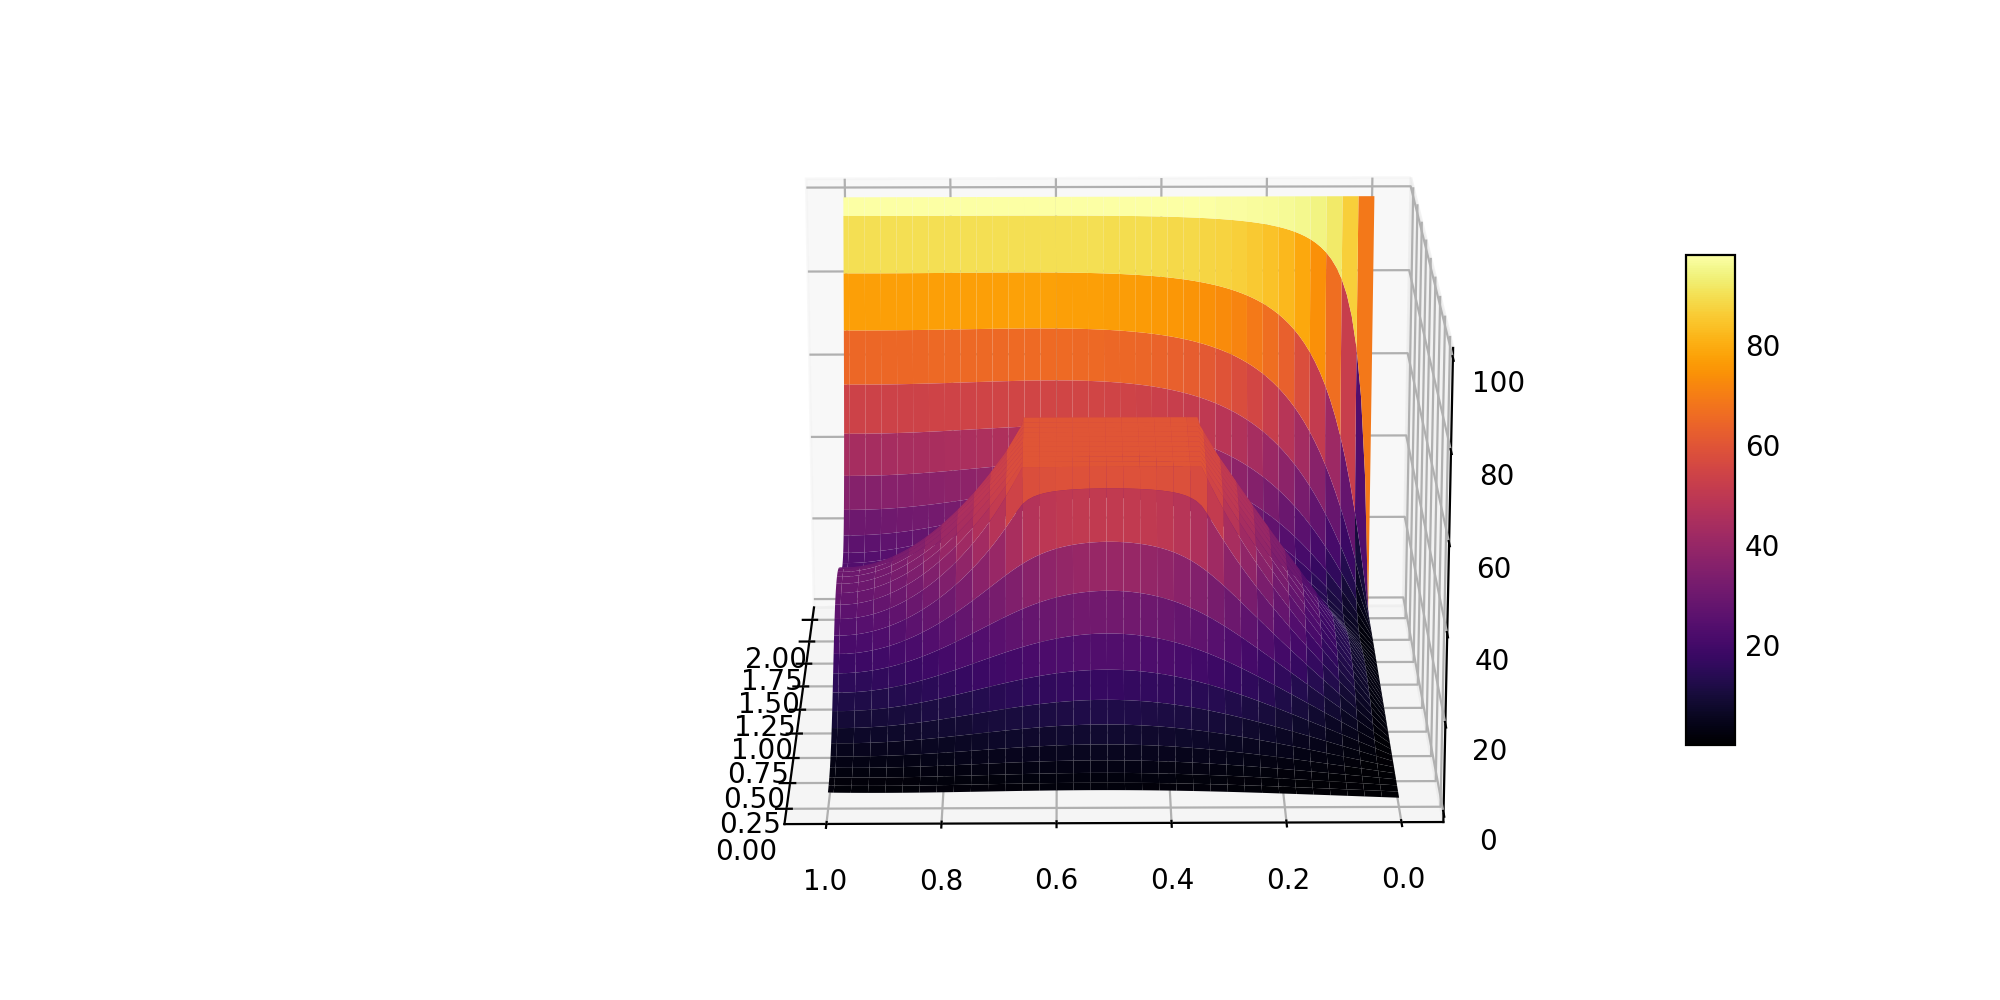

56.460506200790405


In [9]:
start_time = time.time()
lambd = 1
#f0 = 10
q = 2
L_x = 2
L_y = 1
m = 100
n = 100
h_x = L_x / m
h_y = L_y / n
x_i = np.arange(0, L_x+h_x, h_x)
y_j = np.arange(0, L_y+h_y, h_y)
M = 0
r_i = len(x_i)
r_j = len(y_j)
g_y_x = np.zeros([r_j, r_i]) #сетка размером r_j * r_i
Temp = 100
T0 = 60
for i in range(r_i): #гран условие при y = 0
    g_y_x[0][i] = 0
for j in range(r_j): #гран условие при x = X
    g_y_x[j][r_i-1] = Temp
for i in range(r_i):
    for j in range(r_j):
        g_y_x[j][i] += 0
print(g_y_x)
alph1 = np.zeros([r_i])
beta1 = np.zeros([r_i])
alph2 = np.zeros([r_j])
beta2 = np.zeros([r_j])
#задаем f0
def f0(c, x, y, T = T0):
    return c * T
def f1(c, x, y, T = T0):
    return -c
#задаем лямбду
def lambd_x_y(lambd, x, y):
    return lambd *(1 + x ** 2 * y)
def lambd_m_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y + h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y + h_y))
def lambd_m_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x, y - h_y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x, y - h_y))
def lambd_n_plus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x + h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x + h_x, y))
def lambd_n_minus(lambd, x, y):
    return 2 * lambd_x_y(lambd, x, y)*lambd_x_y(lambd, x - h_x, y) / (lambd_x_y(lambd, x, y) + lambd_x_y(lambd, x - h_x, y))
#задаем беты
def beta_N(lambd, x, y):
    return lambd_m_plus(lambd, x, y) * h_x / h_y
def beta_S(lambd, x, y):
    return lambd_m_minus(lambd, x, y) * h_x / h_y
def beta_W(lambd, x, y):
    return lambd_n_minus(lambd, x, y) * h_y / h_x
def beta_E(lambd, x, y):
    return lambd_n_plus(lambd, x, y) * h_y / h_x
def beta_P(lambd, x, y, c):
    return beta_N(lambd, x, y) + beta_S(lambd, x, y) + beta_W(lambd, x, y) + beta_E(lambd, x, y) - f1(c, x, y) * h_x * h_y
for s in range(100):
    # продольная прогонка
    for j in range(1,r_j-1):
        #beta_N = lambd * h_x / h_y
        #beta_W = lambd * h_y / h_x
        #beta_S = lambd * h_x / h_y
        #beta_E = lambd * h_y / h_x
        #beta_P = beta_E + beta_N + beta_S + beta_W
        #нет потока
        alph1[0] = 1
        beta1[0] = 0
        for i in range(1,r_i-1):
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph1[i] = -E / (W * alph1[i - 1] - P)
            beta1[i] = (-F - N * g_y_x[j+1][i] - S * g_y_x[j-1][i] - W * beta1[i-1]) / (W * alph1[i - 1] - P)
            #if M != 0: print(alph1[i], beta1[i], F, P, M)
        #g_y_x[j][r_i-1] = (-F - N * g_y_x[j+1][r_i-1] - S * g_y_x[j-1][r_i-2] - W * beta1[r_i-2]) / (-P + W * alph1[r_i-2]) 
        for m in range(r_i - 2, -1, -1):
            g_y_x[j][m] = g_y_x[j][m + 1] * alph1[m] + beta1[m]
    # поперечная прогонка   
    for i in range(1,r_i-1):
        alph2[0] = 0
        beta2[0] = 0
        for j in range(1,r_j-1):
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            if x_i[i] >= L_x / 3 and x_i[i] <= 2*L_x / 3 and y_j[j] >= L_y / 3 and y_j[j] <= 2*L_y / 3:
                lambd = pow(10, 15)
                M = pow(10, 30)
            else:
                lambd = 1
                M = 0
            lyambd = lambd_x_y(lambd, x_i[i], y_j[j])
            E = beta_E(lambd, x_i[i], y_j[j])
            W = beta_W(lambd, x_i[i], y_j[j])
            P = beta_P(lambd, x_i[i], y_j[j], M)
            N = beta_N(lambd, x_i[i], y_j[j])
            S = beta_S(lambd, x_i[i], y_j[j])
            F = f0(M, x_i[i], y_j[j]) * h_x * h_y
            alph2[j] = -N / (S * alph2[j - 1] - P)
            beta2[j] = (-F -E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * beta2[j-1]) / (S * alph2[j - 1] - P)
        #g_y_x[r_j-2][i] =  (-F - E * g_y_x[j][i + 1] - W * g_y_x[j][i - 1] - S * q * h_y / lyambd) / (S - P)
        #if i == 1: g_y_x[r_j-2][0] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        if i == 1: g_y_x[r_j-1][0] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        g_y_x[r_j-1][i] = (beta2[r_j - 2] + q * h_y / lyambd) / (1 - alph2[r_j-2])
        for m in range(r_j - 2, -1, -1):
            g_y_x[m][i] = g_y_x[m+1][i] * alph2[m] + beta2[m]
    print(s)

    
print(g_y_x)
plt.style.use('_mpl-gallery')
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(projection='3d')
axes.set_zlim(0, 100)
#ax_3d = Axes3D(fig)
xgrid, ygrid = np.meshgrid(x_i, y_j)
surf = axes.plot_surface(xgrid, ygrid, g_y_x, cmap='inferno')
#axes.set_zlim(0, 100)
plt.rcParams['axes.grid'] = False
fig.colorbar(surf, shrink = 0.5, aspect = 10)
print(time.time() - start_time)
plt.show() 